## Optimizing Medical Data Extraction with AWS Comprehend medical for Healthcare Analytics
**A Step-by-Step Guide to Using Entities, RxNorm, and SNOMED CT**

The goal of this article is to provide a tutorial on how to use Amazon Comprehend Medical to optimize medical data extraction. This guide offers a simplified overview of how to utilize the service to process unstructured medical data.

The tutorial will explain how to work with the service in real-time and how to implement batch processing jobs. Additionally, it includes an explanation of the outcomes obtained using the well-known methods: Entities, RxNorm, and SNOMED CT.


# 🩺 Amazon Comprehend Medical
**Amazon Comprehend Medical** is a service designed to extract information from unstructured medical texts using natural language processing model (NLP) while ensuring compliance with HIPAA requirements. 
This service provide the following outputs:
* **Entities**: Key medical elements identified in the text, such as medications, diagnoses, symptoms, and procedures. 
* **RxNorm Codes**: These codes are derived from a medical ontology that provides normalized names for medications and drugs, ensuring consistent identification and categorization of medication-related information.
* **SNOMED CT**: This code set originates from a comprehensive medical ontology that represents clinical concepts such as diseases, procedures, and diagnoses, facilitating precise and interoperable health data.


> At the time of writing this article, only English texts can be processed usign this service.

![aws-comprenhend-medical](img/aws-comprehend-medical.png)


### 🛡️ What is HIPAA?

The **HIPAA (Health Insurance Portability and Accountability Act)** privacy rule sets national standards for the protection of individually identifiable health information in the United States.

This refers to data, including demographic information, that relates to:
* The individual's past, present, or future physical or mental health or condition,
* The provision of healthcare to the individual, or
* The past, present, or future payment for healthcare provided to the individual, and that identifies the individual or can reasonably be used to identify them, where this includes common identifiers such as name, address, date of birth, and Social Security number.
  
---

### 📚 What are the vocabularies?

"Vocabularies" refer to structured sets of standardized terms and codes used to capture, classify, and analyze patient data. These include controlled vocabularies, terminologies, hierarchies, and ontologies, and are essential for interoperability between healthcare systems, enabling data exchange and facilitating global research.
This practice dates back to the 1660s, as shown in the image below.

>"Medical vocabularies date back to the Bills of Mortality in medieval London to manage outbreaks of plague and other diseases."
> [The Book Of Ohdsi](https://ohdsi.github.io/TheBookOfOhdsi/StandardizedVocabularies.html)

<center>
<img src="img/vocabularies.png" alt="vocabularies" width="50%"/>
<p> Image source: <a href ="https://ohdsi.github.io/TheBookOfOhdsi/StandardizedVocabularies.html">The Book Of Ohdsi</a></p>
</center>


### 🩺 AWS Comprehend Medical: Detect Entities

The **detect_entities_v2** method from AWS Comprehend Medical identifies and classifies various categories of medical information within a text. Below is an image illustrating the categories detected by this method. [6]

![entity-1](img/entity-1.png)


For each of these classes, not only are the categories to which the entity belongs detected, but also other key values. These values include:

* **Type**: The specific type of entity within a category.
* **Attribute**: Relevant information about the entity, such as the dosage of a medication.
* **Trait**: Additional aspects that Amazon Comprehend Medical understands about an entity based on context, such as the NEGATION trait if a medication is not being administered to the patient.

Below, you can see the additional data that can be obtained for each category.

![entity-2.png](img/entity-2-1.png)
![entity-2.png](img/entity-2-2.png)
![entity-2.png](img/entity-2-3.png)
![entity-2.png](img/entity-2-4.png)
![entity-2.png](img/entity-2-5.png)
![entity-2.png](img/entity-2-6.png)
![entity-2.png](img/entity-2-7.png)

----

### 🩺 AWS Comprehend Medical: RxNorm

RxNorm is a standardized medical ontology that provides normalized names for clinical medications, and also It serves as a comprehensive resource for identifying and categorizing drugs and their various forms. RxNorm links these standardized names to many other drug vocabularies, ensuring consistency and interoperability across different healthcare systems.

Below is an example with a medication and the related concepts in **RxNorm**.

![rxnorm](img/rnxorm-1.png)

---

### 🩺 AWS Comprehend Medical: SNOMED CT (Clinical Terms)
**SNOMED CT** (Systematized Nomenclature of Medicine -- Clinical Terms) is a comprehensive multilingual health terminology system. It provides a standardized set of codes, concepts, and synonyms to represent clinical information, including diseases, procedures, and diagnoses. 

> SNOMED CT facilitates semantic interoperability by allowing mapping between different health vocabularies, such as `ICD-9` and `ICD-10`.

![snomed-ct](img/snomed_concepts.png)
![snomed-ct](img/snomed_concepts_c1.png)

## 🩺 Dataset
For this tutorial, we will use a dataset from **Kaggle** that is associated with the USMLE® Step 2 Clinical Skills examination, this licensing exam evaluates the examinee's ability to recognize pertinent clinical facts during interactions with standardized patients.

We will use select medical notes from this dataset to process and analyze the results obtained using the AWS Comprehend Medical service.

![database_nbme.png](img/database_nbme.png)

source: [NBME - Score Clinical Patient Notes](https://www.kaggle.com/c/nbme-score-clinical-patient-notes/data?select=patient_notes.csv)


### 🔧 Prerequisites

To complete this tutorial, you need to meet the following prerequisites:


* **AWS Credentials**: You must configure the `AWS_ACCESS_KEY` and `AWS_SECRET_KEY` credentials. These are crucial for authenticating and authorizing access to AWS services.
* **S3 Bucket**: Create an S3 bucket to store your data. In this example, we will use a bucket named `dev-medical-notes` located in the `us-east-1` region.
* **Permissions**: Check the IAM folder in this repository for the necessary policies and permissions to apply.

> ⚠️ If you're not familiar with creating AWS credentials or setting up an S3 bucket, you can follow this guide: [Create a Bucket](https://docs.aws.amazon.com/AmazonS3/latest/userguide/creating-bucket.html).

---

**🔐 AWS Credentials**<br>

For this tutorial, AWS credentials (`AWS_ACCESS_KEY` and `AWS_SECRET_KEY`) are required, these credentials are essential for authenticating and authorizing access to AWS services and they can be generated using the **IAM** (Identity and Access Management) service.

> ⚠️ Remember to keep your credentials secure and avoid sharing them to prevent unauthorized access to your AWS account.

---

**🔐 IAM Policies and Role**<br>

For this tutorial, you need a role and a user with specific policies applied. In the [GitHub repository](https://github.com/r0mymendez/aws-comprehend-medical/tree/main/iam), you'll find a folder containing the policies that need to be applied.

---

**📦 AWS Libraries**<br>

The main libraries we will use are:

* **boto3**: This library allows us to connect programmatically to Amazon Web Services (AWS) services.
* **awswrangler**: This open-source Python library integrates pandas with AWS, enabling seamless data manipulation and analysis within AWS services.

----

**🔧 Configuration Setup**<br>

To manage AWS credentials, we will use the python-dotenv library to handle environment variables.
You need to create a file named .env in the root of the project and configure your AWS credentials there. Below, you will find the format for the file.

> File Name: `.env`
```yaml
AWS_SECRET_KEY='mySecretKey'
AWS_ACCESS_KEY='myAccessKey'
AWS_ROLE='arn:aws:iam::xxxx:role/role-name'
```

---

**⚠️ Considerations**<br>

To simplify this tutorial and reduce the complexity of implementing a solution, two classes were created, which are as follows:

`📦 S3bucket Class`<br>

To simplify the explanation of this tutorial and manage the files stored in an S3 bucket, I have created a class named S3bucket. This class will enable us to perform various common operations such as listing the files in a bucket, writing a JSON file, writing a Parquet file, and reading a JSON file.

`📦 ComprehendMedical Class`<br>

To make it easier to use AWS Comprehend Medical and create DataFrames from the processed data, I have developed a class named ComprehendMedical. This class is designed to streamline interactions with the service's methods, including detect_entities_v2, infer_rx_norm, and infer_snomed_ct. Below are the primary methods of this class and their functionalities:

- **get_entities**: This method uses the detect_entities_v2 function from AWS Comprehend Medical to identify medical entities in a given text.
- **get_rxnorm**: This method employs the infer_rx_norm function to extract medication-related information from the text.
- **get_snomed**: This method uses the infer_snomedct function to identify and obtain information related to standardized medical terms in the SNOMED CT system.

> **⚒️ Methods to Generate DataFrames**
> Each of the above methods also has a version that returns the results in DataFrame format using pandas. These DataFrames are then saved in Parquet format, which is efficient for storage and querying, and facilitates integration with other data processing tools. The Parquet files are stored in a new 📁 folder named "stage" within the same Amazon S3 bucket.

In [2]:
# libraries for data processing
import pandas as pd 
import numpy as np
import json, os,io,re
from tqdm import tqdm
from datetime import datetime
from pprint import pprint
import uuid


# libraries for loading environment variables
from dotenv import load_dotenv

# aws libraries
import boto3
import awswrangler as wr

# libraries for data visualization
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl


In [3]:
# load environment variables
load_dotenv()

AWS_ACCESS_KEY = os.getenv("AWS_ACCESS_KEY")
AWS_SECRET_KEY = os.getenv("AWS_SECRET_KEY")
AWS_ROLE = os.getenv("AWS_ROLE")
AWS_REGION_NAME = 'us-east-1'
BUCKET_NAME = 'dev-medical-notes'

In [5]:
class S3bucket:
    def __init__(self, bucket_name:str, aws_access_key_id:str, aws_secret_access_key:str, region_name:str):
        self.bucket_name = bucket_name
        self.aws_access_key_id = aws_access_key_id
        self.aws_secret_access_key = aws_secret_access_key
        self.session = boto3.Session(aws_access_key_id=self.aws_access_key_id, aws_secret_access_key=self.aws_secret_access_key,region_name =region_name)
        self.s3 = boto3.client('s3', aws_access_key_id=self.aws_access_key_id, aws_secret_access_key=self.aws_secret_access_key)

    def list_files(self,dataframe=True):
        response = self.s3.list_objects_v2(Bucket=self.bucket_name)['Contents']
        if dataframe:
            return pd.DataFrame(response)
        else: 
            return response
    
    def write_s3_json(self, data, filename):
        json_data_bytes = json.dumps(data).encode('utf-8')
        json_buffer = io.BytesIO(json_data_bytes)
        self.s3.put_object(Bucket=self.bucket_name, Key=filename, Body=json_buffer)

    def write_s3_parquet(self, data, filename):
        path = f"s3://{self.bucket_name}/{filename}"
        wr.s3.to_parquet(
            df=data,
            path=path,
            dataset=True,
            index=False,
            boto3_session=self.session
        )
    def read_s3_json(self, filename):
        obj = self.s3.get_object(Bucket=self.bucket_name, Key=filename)
        return json.loads(obj['Body'].read().decode('utf-8'))
        
class ComprehendMedical:
    def __init__(self, aws_region_name, aws_access_key, aws_secret_access) -> None:
        self.client = boto3.client(service_name='comprehendmedical', 
                                   region_name=aws_region_name,
                                   aws_access_key_id=aws_access_key,
                                   aws_secret_access_key=aws_secret_access)
        self.cache = {} 

    def get_entities(self, text: str) -> dict:
        return self.cache.setdefault('entities', {}).get(text, self._fetch_and_cache('entities', text))

    def get_rxnorm(self, text: str) -> dict:
        return self.cache.setdefault('rxnorm', {}).get(text, self._fetch_and_cache('rxnorm', text))

    def get_snomed(self, text: str) -> dict:
        return self.cache.setdefault('snomed', {}).get(text, self._fetch_and_cache('snomed', text))

    def _fetch_and_cache(self, category, text):
        if category == 'entities':
            result = self.client.detect_entities_v2(Text=text)
        elif category == 'rxnorm':
            result = self.client.infer_rx_norm(Text=text)
        elif category == 'snomed':
            result = self.client.infer_snomedct(Text=text)
        self.cache[category][text] = result
        return result

    def _create_dataframe(self, data, metadata_columns):
        df = pd.DataFrame(data)
        for column, value in metadata_columns.items():
            df[column] = value
        return df
    
    def _extract_metadata_columns(self, response):
        metadata = response['ResponseMetadata']
        metadata_columns = {
            'ModelVersion': response['ModelVersion'],
            'metadataRequestId': metadata['RequestId'],
            'metadataRequestDate': metadata['HTTPHeaders']['date']
        }
        return metadata_columns

    def get_entities_dataframe(self, text: str):
        entities = self.get_entities(text)
        metadata_columns = self._extract_metadata_columns(entities)
        mapped_df   = self._create_dataframe(entities['Entities'], metadata_columns)
        unmapped_df = self._create_dataframe(entities['UnmappedAttributes'], metadata_columns)
        return mapped_df, unmapped_df

    def get_rxnorm_dataframe(self, text: str) -> pd.DataFrame:
        rxnorm = self.get_rxnorm(text)
        metadata_columns = self._extract_metadata_columns(rxnorm)
        return self._create_dataframe(rxnorm['Entities'], metadata_columns)

    def get_snomed_dataframe(self, text: str) -> pd.DataFrame:
        snomed = self.get_snomed(text)
        metadata_columns = self._extract_metadata_columns(snomed)
        return self._create_dataframe(snomed['Entities'], metadata_columns)



In [6]:
# create an object of the class S3bucket for the bucket 'dev-medical-notes'
s3 = S3bucket(BUCKET_NAME, AWS_ACCESS_KEY, AWS_SECRET_KEY, AWS_REGION_NAME)

---

### 🟣 Data Extraction and Preparation

The first step in the process is to extract a subset of medical notes and upload them to **Amazon S3** in JSON **{}** format. To facilitate the organization and management of these files, they will be stored in a 📁 folder named "raw," which will be preceded by a 📅 date prefix (dt).

The 📁 "raw" folder will serve as the container for the original, unprocessed files, while the date prefix will help classify and manage the files based on when they were uploaded.


In [7]:
data = pd.read_csv('data/patient_notes.csv')
data['pn_history_len']=data['pn_history'].str.len()

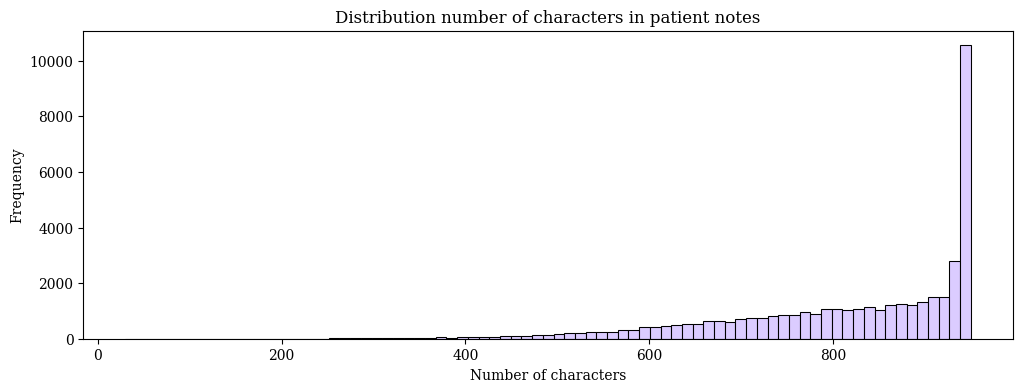

In [8]:
# Plotting the distribution of the number of characters in patient notes
mpl.rcParams['font.family'] = 'serif'
plt.figure(figsize=(12,4))
sns.histplot(data['pn_history_len'], color=sns.color_palette('pastel')[4])
plt.title('Distribution number of characters in patient notes')
plt.xlabel('Number of characters')
plt.ylabel('Frequency')
plt.show()

**🔍 Analysis of Clinical Note Lengths**<br>
In summary, there is significant variability in the length of clinical notes. However, most notes typically fall within a certain range, below are the key points and future considerations for this analysis:

1. **📊 Distribution of Note Lengths**
    - The majority of notes are between `800` and `1000` characters.
    - Some notes are shorter, with `less than 200` characters.
2. **🧹 Data Cleaning**
    - It is crucial to ensure that the notes do `not contain unnecessary characters`, such as repetitions or sequences of special symbols.
    - It is recommended to perform a preliminary cleaning of the notes to `remove these characters` before processing.
3. **🔍 Future Research Questions** <br>
    Although some of these questions cannot be answered with our dataset, these are some questions we could consider for analyzing a similar dataset:
    - **Type of Patients:** What `types of patients` have the shortest and longest notes?
    - **Relation to Severity:** Is there a relationship between the length of the note and `the severity of the patient's condition`?
    - **Temporal Evolution:** How has the average length of the notes `changed over time`?

Additionally, since AWS Comprehend Medical processes notes up to `10,000` characters, performing this analysis is ideal for optimizing the usage of this service.

---

**Selecting Random Notes**

In [9]:
# seelcting random notes to test the function
random_notes = [42141, 39049, 40593, 38851, 41068, 39457, 39152, 39665, 37830, 41717]

# selecting the notes from the data
data_test = data.reset_index().rename({'index':'id'},axis=1).loc[random_notes,:].to_dict('records')
# see the first 3 notes
data_test[:3]

[{'id': 42141,
  'pn_num': 95330,
  'case_num': 9,
  'pn_history': 'Ms. Madden is a 20 yo female presenting w/ the worst HA of her life, unlike anything that she has had before. It is a dull + constant pain, it has gotten progressively worse, started yesterday morn. It is a diffuse pain felt around her head and is nonpulsating. She has photophobia but no phonophobia, has nausea, and vomited 3x yesterday. No sick contacts. Felt warm earlier. No chills, fatigue, CP, SOB, abd pain, or rashes. No sx before the onset of this HA. Ibuprofen, tylenol, sleep have not helped. Walking + bending over makes the pain worse. She has had HA before once or twice a yr but they are usually very mild. \r\nMeds: OCPs\r\nFH: mother w/ migraines, dad w/ HPL\r\nSocial alcohol use, 3 or 4 marijuana joints per week, no tobacco use\r\nPMH: none significant',
  'pn_history_len': 765},
 {'id': 39049,
  'pn_num': 92131,
  'case_num': 9,
  'pn_history': '20 yo F, c/o headaches.\r\n- started yesterday, right after sh

In [10]:
# write the data to the s3 bucket
for record in tqdm(data_test):
    dt =f"dt={datetime.now().strftime('%Y%m%d')}"
    record_file_name = f"medical_record_noteId_{record['id']}.json"
    s3.write_s3_json(data=record, filename=f"raw/{dt}/{record_file_name}")


100%|██████████| 10/10 [00:02<00:00,  3.59it/s]


In [11]:
# List the raw files in the s3 bucket
s3_files_data = s3.list_files()
s3_files_data[s3_files_data['Key'].str.contains('raw')]

,Key,LastModified,ETag,Size,StorageClass
0,raw/dt=20240804/medical_record_noteId_37830.json,2024-08-04 14:55:24+00:00,"""c65efa04e253a7be404a9225f9d21444""",899,STANDARD
1,raw/dt=20240804/medical_record_noteId_38851.json,2024-08-04 14:55:22+00:00,"""6a4d5e7afceee84bf509e20bd0a4ab00""",662,STANDARD
2,raw/dt=20240804/medical_record_noteId_39049.json,2024-08-04 14:55:22+00:00,"""5f1912bf093272316fca294a7a9f36fa""",670,STANDARD
3,raw/dt=20240804/medical_record_noteId_39152.json,2024-08-04 14:55:23+00:00,"""e7d20efbffbaafa122fc7b0efb90af93""",956,STANDARD
4,raw/dt=20240804/medical_record_noteId_39457.json,2024-08-04 14:55:23+00:00,"""1ac2fe9f5e5e45000a1d057ec0e85c78""",996,STANDARD
5,raw/dt=20240804/medical_record_noteId_39665.json,2024-08-04 14:55:23+00:00,"""e08d763e21b2f83ecd778d97006dc03d""",875,STANDARD
6,raw/dt=20240804/medical_record_noteId_40593.json,2024-08-04 14:55:22+00:00,"""053f227bb3d413d0b24662fce0465c1e""",611,STANDARD
7,raw/dt=20240804/medical_record_noteId_41068.json,2024-08-04 14:55:23+00:00,"""61bb5db534a2fe9a21c03909b05cd662""",951,STANDARD
8,raw/dt=20240804/medical_record_noteId_41717.json,2024-08-04 14:55:24+00:00,"""826c64d8fa93bf35f58ecc98d7059781""",632,STANDARD
9,raw/dt=20240804/medical_record_noteId_42141.json,2024-08-04 14:55:22+00:00,"""943047e3fe6628cbb2af509e239adfee""",859,STANDARD


>**🧹 Retrieval and Cleaning of Notes**<br>
>We will retrieve note 42141 from the S3 bucket, specifically from the folder "raw". Using these data, we will use the re module to replace the characters \r, \t, and \n, which correspond to line breaks and tabs. <br>
Next, we will review the dictionary with the note and proceed to modify these characters in the retrieved text.

In [12]:
# Read the data from the s3 bucket 
note_id = 42141
note = s3.read_s3_json(f'raw/dt=20240804/medical_record_noteId_{note_id}.json')
pprint(note)
note_clean = re.sub(r'[\n\r\t]', ' ',note['pn_history'])

{'case_num': 9,
 'id': 42141,
 'pn_history': 'Ms. Madden is a 20 yo female presenting w/ the worst HA of her '
               'life, unlike anything that she has had before. It is a dull + '
               'constant pain, it has gotten progressively worse, started '
               'yesterday morn. It is a diffuse pain felt around her head and '
               'is nonpulsating. She has photophobia but no phonophobia, has '
               'nausea, and vomited 3x yesterday. No sick contacts. Felt warm '
               'earlier. No chills, fatigue, CP, SOB, abd pain, or rashes. No '
               'sx before the onset of this HA. Ibuprofen, tylenol, sleep have '
               'not helped. Walking + bending over makes the pain worse. She '
               'has had HA before once or twice a yr but they are usually very '
               'mild. \r\n'
               'Meds: OCPs\r\n'
               'FH: mother w/ migraines, dad w/ HPL\r\n'
               'Social alcohol use, 3 or 4 marijuana joi

In [13]:
print(note_clean)

Ms. Madden is a 20 yo female presenting w/ the worst HA of her life, unlike anything that she has had before. It is a dull + constant pain, it has gotten progressively worse, started yesterday morn. It is a diffuse pain felt around her head and is nonpulsating. She has photophobia but no phonophobia, has nausea, and vomited 3x yesterday. No sick contacts. Felt warm earlier. No chills, fatigue, CP, SOB, abd pain, or rashes. No sx before the onset of this HA. Ibuprofen, tylenol, sleep have not helped. Walking + bending over makes the pain worse. She has had HA before once or twice a yr but they are usually very mild.   Meds: OCPs  FH: mother w/ migraines, dad w/ HPL  Social alcohol use, 3 or 4 marijuana joints per week, no tobacco use  PMH: none significant


---

### 🟣 Real-Time Processing with AWS Comprehend Medical

In [71]:
# create an object of the class ComprehendMedical to use the comprehend medical service
aws_comprehendMedical = ComprehendMedical(
                        aws_region_name=AWS_REGION_NAME,
                        aws_access_key=AWS_ACCESS_KEY,
                        aws_secret_access=AWS_SECRET_KEY)

**🩺 AWS Comprehend Medical: Entities**

In [100]:
# get the entities from the note 
tmp_entities = aws_comprehendMedical.get_entities_dataframe(text=note_clean)
# With the function get_entities_dataframe we can get the mapped and unmapped entities
mapped_df, unmapped_df = tmp_entities
mapped_df.head(3)

,Id,BeginOffset,EndOffset,Score,Text,Category,Type,Traits,Attributes,ModelVersion,metadataRequestId,metadataRequestDate
0,52,4,10,0.999992,Madden,PROTECTED_HEALTH_INFORMATION,NAME,[],NaN,3.0.0,eba0293c-dd58-4da5-9c23-9b310887b90e,"Sun, 04 Aug 2024 15:00:07 GMT"
1,53,16,18,0.998995,20,PROTECTED_HEALTH_INFORMATION,AGE,[],NaN,3.0.0,eba0293c-dd58-4da5-9c23-9b310887b90e,"Sun, 04 Aug 2024 15:00:07 GMT"
2,1,22,28,0.861741,female,BEHAVIORAL_ENVIRONMENTAL_SOCIAL,GENDER,[],NaN,3.0.0,eba0293c-dd58-4da5-9c23-9b310887b90e,"Sun, 04 Aug 2024 15:00:07 GMT"


In [101]:
unmapped_df.head(3)

,Type,Attribute,ModelVersion,metadataRequestId,metadataRequestDate
0,MEDICAL_CONDITION,"{'Type': 'QUALITY', 'Score': 0.533059656620025...",3.0.0,eba0293c-dd58-4da5-9c23-9b310887b90e,"Sun, 04 Aug 2024 15:00:07 GMT"
1,MEDICAL_CONDITION,"{'Type': 'QUALITY', 'Score': 0.660335183143615...",3.0.0,eba0293c-dd58-4da5-9c23-9b310887b90e,"Sun, 04 Aug 2024 15:00:07 GMT"


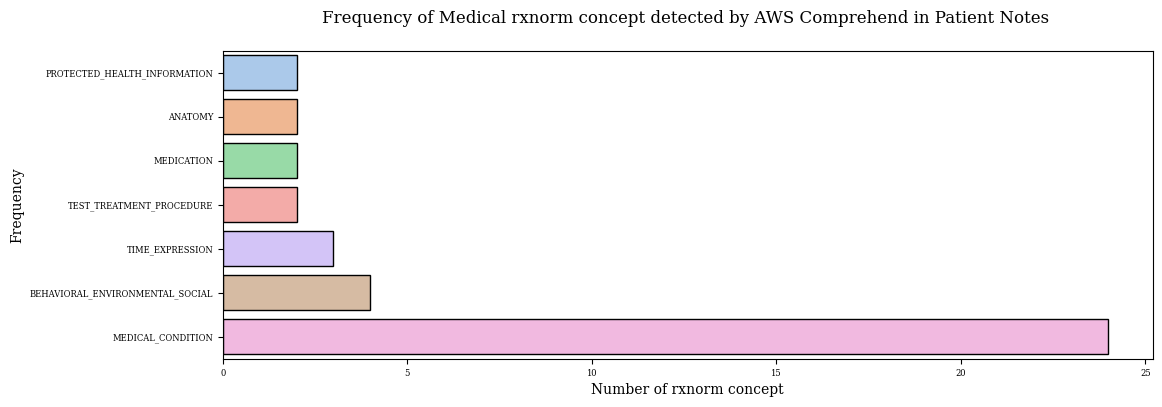

In [164]:
# Plot the frequency of the medical entities detected by AWS Comprehend
data_category = pd.DataFrame(mapped_df['Category'].value_counts().sort_values()).reset_index() 

fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(y=data_category['Category'], x=data_category['count'], edgecolor='black', ax=ax,  palette='pastel')
ax.set_title('Frequency of Medical rxnorm concept detected by AWS Comprehend in Patient Notes \n')
ax.set_xlabel('Number of rxnorm concept')
ax.set_ylabel('Frequency')

# Reduce the font size of the x and y axis labels
ax.tick_params(axis='x', labelsize=6)
ax.tick_params(axis='y', labelsize=6)

plt.show()

In [99]:
# write the mapped and unmapped entities to the s3 bucket
dt =f"dt={datetime.now().strftime('%Y%m%d')}"
s3.write_s3_parquet(data=mapped_df, filename=f'stage/{dt}/entites/mapped_entities_noteId_{note_id}.parquet')
s3.write_s3_parquet(data=unmapped_df, filename=f'stage/{dt}/entites/unmapped_entities_noteId_{note_id}.parquet')

![entities](img/entities_concepts.png)

**🩺 AWS Comprehend Medical: RxNorm**

In [147]:
# get the rxnorm entities from the note
rxnorm_entities = aws_comprehendMedical.get_rxnorm_dataframe(text=note_clean)
rxnorm_entities.head()

,Id,Text,Category,Type,Score,BeginOffset,EndOffset,Attributes,Traits,RxNormConcepts,ModelVersion,metadataRequestId,metadataRequestDate
0,31,Ibuprofen,MEDICATION,GENERIC_NAME,0.761397,462,471,[],[],"[{'Description': 'ibuprofen', 'Code': '5640', ...",3.0.0.20221107,adc079bc-f9d0-43ed-879f-bedc792ec69d,"Sun, 04 Aug 2024 15:20:02 GMT"
1,32,tylenol,MEDICATION,BRAND_NAME,0.717244,473,480,[],[],"[{'Description': 'tylenol', 'Code': '202433', ...",3.0.0.20221107,adc079bc-f9d0-43ed-879f-bedc792ec69d,"Sun, 04 Aug 2024 15:20:02 GMT"


In [152]:
# Some of the entities are mapped to RxNorm
for item in rxnorm_entities['RxNormConcepts'][0]:
    pprint(item)

{'Code': '5640', 'Description': 'ibuprofen', 'Score': 0.9967318773269653}
{'Code': '10255', 'Description': 'suprofen', 'Score': 0.5894578695297241}
{'Code': '4331', 'Description': 'fenoprofen', 'Score': 0.5856923460960388}
{'Code': '1312748', 'Description': 'truprofen', 'Score': 0.574164867401123}
{'Code': '17387', 'Description': 'alminoprofen', 'Score': 0.5531540513038635}


In [148]:
# Write the RxNorm entities to the s3 bucket
dt =f"dt={datetime.now().strftime('%Y%m%d')}"
s3.write_s3_parquet(data=rxnorm_entities, filename=f'stage/{dt}/rxnorm/rxnorm_entities_noteId_{note_id}.parquet')

![rnorm](img/rxnorm_concept.png)

**🩺 AWS Comprehend Medical: SNOMED CT (Clinical Terms)**

In [153]:
# create a dataframe with the snomed entities
snomed_ct_entities = aws_comprehendMedical.get_snomed_dataframe(text=note_clean)
snomed_ct_entities.head()

,Id,Text,Category,Type,Score,BeginOffset,EndOffset,Attributes,Traits,SNOMEDCTConcepts,ModelVersion,metadataRequestId,metadataRequestDate
0,3,HA,MEDICAL_CONDITION,DX_NAME,0.935061,53,55,"[{'Category': 'MEDICAL_CONDITION', 'Type': 'QU...","[{'Name': 'SYMPTOM', 'Score': 0.95961987972259...","[{'Description': 'Headache (finding)', 'Code':...",3.0.0.20220301,bcd5202f-8150-45b0-81f1-ee4c37ec86be,"Sun, 04 Aug 2024 15:22:13 GMT"
1,6,pain,MEDICAL_CONDITION,DX_NAME,0.920151,134,138,"[{'Category': 'MEDICAL_CONDITION', 'Type': 'QU...","[{'Name': 'SYMPTOM', 'Score': 0.95961987972259...","[{'Description': 'Pain (finding)', 'Code': '22...",3.0.0.20220301,bcd5202f-8150-45b0-81f1-ee4c37ec86be,"Sun, 04 Aug 2024 15:22:13 GMT"
2,10,pain,MEDICAL_CONDITION,DX_NAME,0.935061,215,219,"[{'Category': 'MEDICAL_CONDITION', 'Type': 'QU...","[{'Name': 'SYMPTOM', 'Score': 0.95961987972259...","[{'Description': 'Headache (finding)', 'Code':...",3.0.0.20220301,bcd5202f-8150-45b0-81f1-ee4c37ec86be,"Sun, 04 Aug 2024 15:22:13 GMT"
3,11,head,ANATOMY,SYSTEM_ORGAN_SITE,0.597108,236,240,[],[],[{'Description': 'Head structure (body structu...,3.0.0.20220301,bcd5202f-8150-45b0-81f1-ee4c37ec86be,"Sun, 04 Aug 2024 15:22:13 GMT"
4,13,photophobia,MEDICAL_CONDITION,DX_NAME,0.877546,270,281,[],"[{'Name': 'SYMPTOM', 'Score': 0.92144840955734...","[{'Description': 'Photophobia (finding)', 'Cod...",3.0.0.20220301,bcd5202f-8150-45b0-81f1-ee4c37ec86be,"Sun, 04 Aug 2024 15:22:13 GMT"


In [ ]:
# Write the snomed-ct entities to the s3 bucket
dt =f"dt={datetime.now().strftime('%Y%m%d')}"
s3.write_s3_parquet(data=snomed_ct_entities, filename=f'stage/{dt}/snomed-ct/snomed_ct_noteId_{note_id}.parquet')

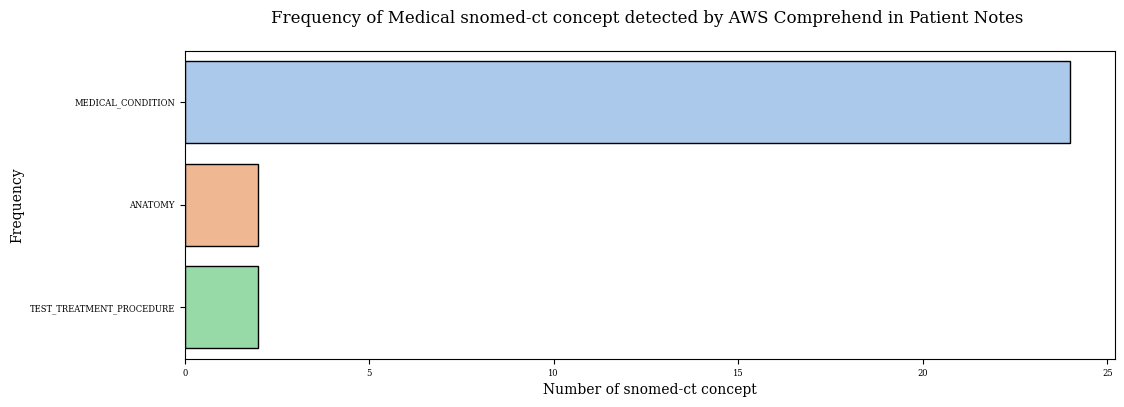

In [162]:
# Plot the frequency of the medical entities detected by AWS Comprehend
data_category = snomed_ct_entities.groupby(['Category']).size().reset_index(name='count').sort_values(by='count', ascending=False)

fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(y=data_category['Category'], x=data_category['count'], edgecolor='black', ax=ax,  palette='pastel')
ax.set_title('Frequency of Medical snomed-ct concept detected by AWS Comprehend in Patient Notes \n')
ax.set_xlabel('Number of snomed-ct concept')
ax.set_ylabel('Frequency')

# Reduce the font size of the x and y axis labels
ax.tick_params(axis='x', labelsize=6)
ax.tick_params(axis='y', labelsize=6)

plt.show()

---

### 🟣 Batch Processing with AWS Comprehend Medical

To perform batch processing, you'll first need to store the notes as individual **txt** files in an S3 bucket. These files will be processed, and the results will be saved in a new folder named **output** within the same bucket.


In [193]:
for record in tqdm(data_test):
    # file name
    dt =f"dt={datetime.now().strftime('%Y%m%d')}"
    record_file_name = f"medical_record_noteId_{record['id']}.txt"

    # write the patient notes to the s3 bucket in txt format
    text =  re.sub(r'[\n\r\t]', ' ', record['pn_history'])
    s3.write_s3_json(data=text, filename=f"stage/{dt}/batch/input/{record_file_name}")

100%|██████████| 10/10 [00:02<00:00,  3.59it/s]


In [203]:
# Crea un cliente para AWS Comprehend Medical
comprehendmedical = boto3.client(service_name='comprehendmedical',
                                 region_name=AWS_REGION_NAME, 
                                 aws_access_key_id=AWS_ACCESS_KEY,
                                   aws_secret_access_key=AWS_SECRET_KEY)

In [223]:
# Create a unique token for the job
comprehendmedical = boto3.client(service_name='comprehendmedical',
                                 region_name=AWS_REGION_NAME, 
                                 aws_access_key_id=AWS_ACCESS_KEY,
                                   aws_secret_access_key=AWS_SECRET_KEY)
# unique token for the job
hash_unique = str(uuid.uuid4())
print('ClientRequestToken', hash_unique)

# Define the parameters for the job
params = {
    "InputDataConfig": {
        "S3Bucket": BUCKET_NAME,
        "S3Key": f"stage/{dt}/batch/input/"
    },
    "OutputDataConfig": {
        "S3Bucket": BUCKET_NAME,
        "S3Key": f"stage/{dt}/batch/output/entities"
    },
    "DataAccessRoleArn": 'arn:aws:iam::905418403124:role/tutorial-comprehemd-medical',
    "JobName": "MyEntitiesDetectionJob",
    "LanguageCode": "en",
    "ClientRequestToken": hash_unique
}

# Inicia el trabajo de detección de entidades
response = comprehendmedical.start_entities_detection_v2_job(**params)
pprint(response)

ClientRequestToken f2d5b0b0-e759-4eea-98a2-be8c1a84b7ee
{'JobId': 'f7a817ee69603aa487eefcee78ef78dc',
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '44',
                                      'content-type': 'application/x-amz-json-1.1',
                                      'date': 'Sun, 04 Aug 2024 17:57:55 GMT',
                                      'x-amzn-requestid': '9fc1114e-8182-4093-be76-f4ea2f02d58e'},
                      'HTTPStatusCode': 200,
                      'RequestId': '9fc1114e-8182-4093-be76-f4ea2f02d58e',
                      'RetryAttempts': 0}}


In [241]:
comprehendmedical.describe_entities_detection_v2_job(JobId=response['JobId'])

{'ComprehendMedicalAsyncJobProperties': {'JobId': 'f7a817ee69603aa487eefcee78ef78dc',
  'JobName': 'MyEntitiesDetectionJob',
  'JobStatus': 'COMPLETED',
  'SubmitTime': datetime.datetime(2024, 8, 4, 19, 57, 56, 28000, tzinfo=tzlocal()),
  'EndTime': datetime.datetime(2024, 8, 4, 20, 8, 8, 348000, tzinfo=tzlocal()),
  'ExpirationTime': datetime.datetime(2024, 12, 2, 18, 57, 56, tzinfo=tzlocal()),
  'InputDataConfig': {'S3Bucket': 'dev-medical-notes',
   'S3Key': 'stage/dt=20240804/batch/input/'},
  'OutputDataConfig': {'S3Bucket': 'dev-medical-notes',
   'S3Key': 'stage/dt=20240804/batch/output/entities/905418403124-EntitiesDetection-f7a817ee69603aa487eefcee78ef78dc/'},
  'LanguageCode': 'en',
  'DataAccessRoleArn': 'arn:aws:iam::905418403124:role/tutorial-comprehemd-medical'},
 'ResponseMetadata': {'RequestId': '29e21365-7784-44b5-9a1a-04170ebd3a0c',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '29e21365-7784-44b5-9a1a-04170ebd3a0c',
   'content-type': 'application/x-

## 📚 References

* [1] Amazon Comprehend Medical, Amazon Web Services, URL: https://aws.amazon.com/es/comprehend/medical/
* [2] Summary of the HIPAA Privacy Rule, U.S Deparment of health human services, URL: https://www.hhs.gov/hipaa/for-professionals/privacy/laws-regulations/index.html
* [3] Boto3 1.34.153 documentation, Amazon Web Services, URL: https://boto3.amazonaws.com/v1/documentation/api/latest/index.html
* [4] AWS SDK for pandas (awswrangler),AWS Professional Service open source , URL: https://aws-sdk-pandas.readthedocs.io/en/stable/
* [5] NBME - Score Clinical Patient Notes,Kaggle, URL: https://www.kaggle.com/c/nbme-score-clinical-patient-notes/data?select=patient_notes.csv
* [6] Detect entities (Version 2), Amazon Web Services, URL: https://docs.aws.amazon.com/comprehend-medical/latest/dev/textanalysis-entitiesv2.html
* [7] RxNorm, National Library of Medicie, URL: https://www.nlm.nih.gov/research/umls/rxnorm/index.html
* [8] Overview of SNOMED CT, National Library of Medicie, URL: https://www.nlm.nih.gov/healthit/snomedct/snomed_overview.html